In [91]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [132]:
#operator definitionis
N=2
si = qeye(2)
sx = 0.5*sigmax()
sy = 0.5*sigmay()
sz = 0.5*sigmaz()

In [133]:
#make list of tensor products
sx_list = []
sy_list = []
sz_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    op_list[n] = sx
    sx_list.append(tensor(op_list))

    op_list[n] = sy
    sy_list.append(tensor(op_list))

    op_list[n] = sz
    sz_list.append(tensor(op_list))
print(sz_list[0])

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.5  0.   0.   0. ]
 [ 0.   0.5  0.   0. ]
 [ 0.   0.  -0.5  0. ]
 [ 0.   0.   0.  -0.5]]


In [148]:
#construct Hamiltonian
B = 0
A0 = 1
H = B*sz_list[0] 
for n in range(N-1):
    H += sz_list[0]*sz_list[n+1] + sx_list[0]*sx_list[n+1] + sy_list[0]*sy_list[n+1]
print(H)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]


In [153]:
#Find eigenvalues and eigenvectors
ebasis = H.eigenstates()[1]
eng = H.eigenstates()[0]
eng

array([-0.75,  0.25,  0.25,  0.25])

In [150]:
#Create initial state
psi0 = basis(2**N,1)
psi0

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

In [154]:
#Evolution
steps = 50
times = np.linspace(0,7)
result = sesolve(H, psi0, times, [sz_list[0]])

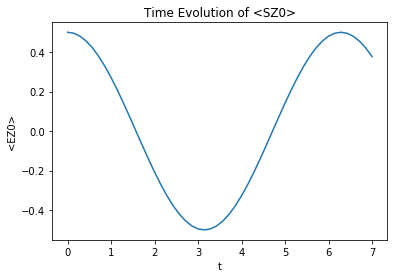

In [155]:
plt.plot(times, result.expect[0])
plt.title('Time Evolution of <SZ0>')
plt.ylabel("<EZ0>")
plt.xlabel("t")
plt.show()